In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This dataset contains the top games on the Google Play Store.

df = pd.read_csv('android-games.csv')

In [19]:
df

,rank,title,total ratings,installs,average rating,Percent growth in 30 days,Percent growth in 60 days,price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
0,1,Garena Free Fire - The Cobra,80678661,5e+08,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037
1,2,PUBG MOBILE: Graffiti Prank,35971961,1e+08,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478
2,3,Mobile Legends: Bang Bang,25836869,1e+08,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640
3,4,Brawl Stars,17181659,1e+08,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,1e+08,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,Piknik Słowo - Word Snack,122845,1e+06,4.67,0.1,0.3,0.0,GAME WORD,96954,17233,5098,1249,2309
1726,97,Wordox – Free multiplayer word game,120476,1e+06,4.21,0.0,0.1,0.0,GAME WORD,74010,21546,10648,4710,9560
1727,98,4 Fotos 1 Palavra,114852,5e+06,4.52,0.3,0.6,0.0,GAME WORD,84688,16783,6619,1867,4892
1728,99,زوايا - لعبة ستحرك زوايا عقلك,110293,1e+06,4.76,0.8,1.9,0.0,GAME WORD,99168,3528,3258,1059,3278


In [7]:
# Since the paid column and price column are repetitive, we will drop the paid column since it does not give us any added information.

df = df.drop(columns=['paid'])

In [23]:
# Since the installs column is recognized as an object type, we need to convert our values to numbers
numTimes = 0

for index, row in df.iterrows():
    array = row['installs'].split(' ')
    number = float(array[0])
    number *= 1000000.0   
    df.at[index, 'installs'] = number

In [21]:
df['installs'] = df['installs'].astype('float')

In [8]:
# Let's add some more clarity to our dataframe by clarifying what the growth value means

df = df.rename(columns={'growth (30 days)': 'Percent growth in 30 days', 'growth (60 days)': 'Percent growth in 60 days'})

Text(0.5, 1.0, 'Top 5 Game Categories in Google Play Store')

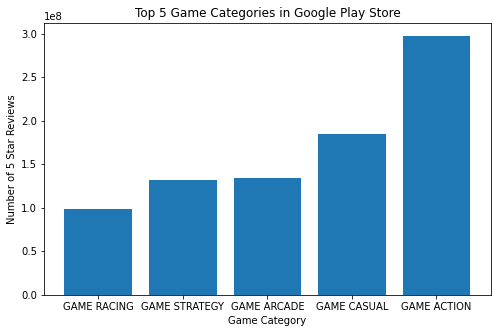

In [38]:
# Let's look at the top 5 categories by number of 5-star reviews

category_groups = df.groupby('category')
stars_dict = {}
ratings = []

for group in category_groups:
    stars_dict[group[1]['5 star ratings'].sum()] = group[0]
    ratings.append(group[1]['5 star ratings'].sum())
    
ratings.sort()

top5categorynames = [stars_dict[x] for x in ratings[-5:]]
top5categoryscores = ratings[-5:]

f, ax = plt.subplots(figsize=(8,5))
plt.bar(x=top5categorynames, height=top5categoryscores)
plt.xlabel('Game Category')
plt.ylabel('Number of 5 Star Reviews')
plt.title('Top 5 Game Categories in Google Play Store')


In [ ]:
# Let's observe the relative user satisfaction for each category by looking at the percentage of 5, 4, 3, 2, and 1 star reviews of the total number of reviews.

